# Case Study - World Happiness Analysis Project

## Table of Contents

1. Importing Libraries
2. Import Data - 2016 Data
3. Data Consistency Check - 2016 Data
4. Data Preparation for Regression Analysis
* a. happiness_score_2016 vs economy_gdp_2016
* b. happiness_score_2016 vs family_2016
* c. happiness_score_2016 vs health_life_expectancy_2016
* d. happiness_score_2016 vs freedom_2016
* e. happiness_score_2016 vs trust_2016
* f. happiness_score_2016 vs generosity_2016
* g. happiness_score_2016 vs dystopia_residual_2016
5. Regression Analysis
* a. happiness_score_2016 vs economy_gdp_2016
* b. happiness_score_2016 vs family_2016
* c. happiness_score_2016 vs health_life_expectancy_2016
* d. happiness_score_2016 vs freedom_2016
* e. happiness_score_2016 vs trust_2016
* f. happiness_score_2016 vs generosity_2016
* g. happiness_score_2016 vs dystopia_residual_2016

# 01. Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# This option ensures the charts created  are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02a. Importing Data

In [50]:
# Path & list setup
path = r'/Users/ChuahLH/Desktop/Data Science/Data Immersion/Achievement 6/World Happiness Analysis'

In [51]:
# Import 2015.csv dataset into notebook using the os library and the vars_list
df_2016 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2016_clean_data.csv'), index_col = False)

In [52]:
df_2016.head()

,Unnamed: 0,Country,Region,happiness_rank_2016,happiness_score_2016,lower_confidence_2016,upper_confidence_2016,economy_gdp_2016,family_2016,health_life_expectancy_2016,freedom_2016,trust_2016,generosity_2016,dystopia_residual_2016
0,0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [53]:
# Drop the redundant columns
df_2016 = df_2016.drop(['Unnamed: 0'],axis = 1)

In [54]:
df_2016.shape

(157, 13)

In [55]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      157 non-null    object 
 1   Region                       157 non-null    object 
 2   happiness_rank_2016          157 non-null    int64  
 3   happiness_score_2016         157 non-null    float64
 4   lower_confidence_2016        157 non-null    float64
 5   upper_confidence_2016        157 non-null    float64
 6   economy_gdp_2016             157 non-null    float64
 7   family_2016                  157 non-null    float64
 8   health_life_expectancy_2016  157 non-null    float64
 9   freedom_2016                 157 non-null    float64
 10  trust_2016                   157 non-null    float64
 11  generosity_2016              157 non-null    float64
 12  dystopia_residual_2016       157 non-null    float64
dtypes: float64(10), int6

# 03a. Data Consistency Check - 2016 Data

In [56]:
# check for missing values
df_2016.isnull().sum()

Country                        0
Region                         0
happiness_rank_2016            0
happiness_score_2016           0
lower_confidence_2016          0
upper_confidence_2016          0
economy_gdp_2016               0
family_2016                    0
health_life_expectancy_2016    0
freedom_2016                   0
trust_2016                     0
generosity_2016                0
dystopia_residual_2016         0
dtype: int64

Confirmed no missing values

In [57]:
# Finding Duplicates
df_dups_2016 = df_2016[df_2016.duplicated()]

In [58]:
df_dups_2016

,Country,Region,happiness_rank_2016,happiness_score_2016,lower_confidence_2016,upper_confidence_2016,economy_gdp_2016,family_2016,health_life_expectancy_2016,freedom_2016,trust_2016,generosity_2016,dystopia_residual_2016


Confirmed no duplicated values.

In [59]:
df_2016.describe()

,happiness_rank_2016,happiness_score_2016,lower_confidence_2016,upper_confidence_2016,economy_gdp_2016,family_2016,health_life_expectancy_2016,freedom_2016,trust_2016,generosity_2016,dystopia_residual_2016
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


# 04a. Data Preparation for Regression Analysis - 2016 Data

### happiness_score_2016 vs economy_gdp_2016

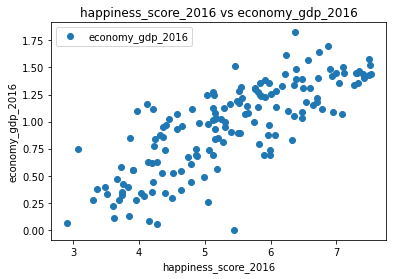

In [60]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2016.plot(x = 'happiness_score_2016', y='economy_gdp_2016',style='o')
plt.title('happiness_score_2016 vs economy_gdp_2016')  
plt.xlabel('happiness_score_2016')  
plt.ylabel('economy_gdp_2016')  
plt.show()

In [61]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2016['happiness_score_2016'].values.reshape(-1,1)
y = df_2016['economy_gdp_2016'].values.reshape(-1,1)

In [62]:
X

array([[7.526],
       [7.509],
       [7.501],
       [7.498],
       [7.413],
       [7.404],
       [7.339],
       [7.334],
       [7.313],
       [7.291],
       [7.267],
       [7.119],
       [7.104],
       [7.087],
       [7.039],
       [6.994],
       [6.952],
       [6.929],
       [6.907],
       [6.871],
       [6.778],
       [6.739],
       [6.725],
       [6.705],
       [6.701],
       [6.65 ],
       [6.596],
       [6.573],
       [6.545],
       [6.488],
       [6.481],
       [6.478],
       [6.474],
       [6.379],
       [6.379],
       [6.375],
       [6.361],
       [6.355],
       [6.324],
       [6.269],
       [6.239],
       [6.218],
       [6.168],
       [6.084],
       [6.078],
       [6.068],
       [6.005],
       [5.992],
       [5.987],
       [5.977],
       [5.976],
       [5.956],
       [5.921],
       [5.919],
       [5.897],
       [5.856],
       [5.835],
       [5.835],
       [5.822],
       [5.813],
       [5.802],
       [5.771],
       [

In [63]:
y

array([[1.44178],
       [1.52733],
       [1.42666],
       [1.57744],
       [1.40598],
       [1.44015],
       [1.46468],
       [1.36066],
       [1.44443],
       [1.45181],
       [1.33766],
       [1.45038],
       [1.50796],
       [1.06879],
       [1.35943],
       [1.44787],
       [1.08754],
       [1.42539],
       [1.48341],
       [1.69752],
       [1.11508],
       [1.64555],
       [1.40283],
       [1.2167 ],
       [1.18306],
       [1.15137],
       [1.30915],
       [1.57352],
       [1.18157],
       [1.30782],
       [1.03032],
       [1.39488],
       [1.0893 ],
       [1.48953],
       [1.39729],
       [1.82427],
       [1.34253],
       [1.05266],
       [0.83454],
       [1.09686],
       [1.61714],
       [1.44024],
       [1.32572],
       [1.13367],
       [1.27973],
       [0.8737 ],
       [1.25142],
       [0.69384],
       [0.73591],
       [1.35495],
       [0.97306],
       [0.87616],
       [1.38007],
       [1.22943],
       [0.69177],
       [1.

In [64]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05a. Regression Analysis - 2016 Data

### happiness_score_2016 vs economy_gdp_2016

In [65]:
# create a regression object

regression = LinearRegression()

In [66]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [67]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

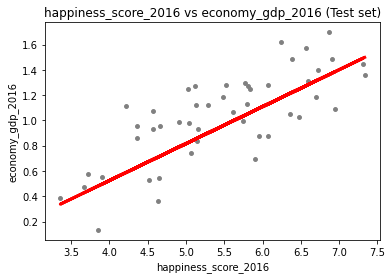

In [68]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs economy_gdp_2016 (Test set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('economy_gdp_2016')
plot_test.show()

In [69]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [70]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29241828]]
Mean squared error:  0.059361801657323104
R2 score:  0.5040723601006201


The plot (test model) shows a positive relationship, so the coefficient is positive (0.292). The slope means that as happiness_score_2016 rises, as well as the economy_gdp_2016 rises too. In this case, the MSE shows 0.059, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2016 to happiness_score_2016. The R2 is 50.4 percent, which the data isn't fit that great. 

In [71]:
y_predicted

array([[1.4991096 ],
       [1.13183224],
       [0.69203515],
       [0.63004247],
       [1.03387212],
       [0.67419763],
       [0.62945764],
       [0.96778559],
       [0.71572103],
       [0.83444285],
       [1.31400883],
       [0.44347961],
       [1.28330491],
       [1.0511248 ],
       [0.71221201],
       [0.48207882],
       [0.58764182],
       [0.82976416],
       [0.49699216],
       [1.0607746 ],
       [1.12890806],
       [1.21985015],
       [1.0543414 ],
       [1.49296882],
       [1.17891159],
       [1.21283211],
       [0.78941044],
       [1.36371994],
       [0.86426952],
       [0.69232757],
       [1.09615721],
       [1.07890453],
       [1.38740582],
       [0.95930546],
       [0.82625514],
       [1.32102687],
       [0.85432729],
       [0.99644258],
       [0.33703936],
       [0.85257279],
       [1.27657929],
       [0.70987266],
       [0.90169906],
       [0.8607605 ],
       [1.374247  ],
       [1.04118258],
       [1.24967681],
       [0.426

In [72]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.36066,1.499110
1,1.27973,1.131832
2,0.93287,0.692035
3,0.95395,0.630042
4,0.99602,1.033872
5,0.52497,0.674198
6,0.86086,0.629458
7,1.27964,0.967786
8,0.95530,0.715721
9,0.74037,0.834443


In [73]:
# predict

y_predicted_train = regression.predict(X_train) 

In [74]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [75]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29241828]]
Mean squared error:  0.06634302476862187
R2 score:  0.6449853712143798


The plot (train model) shows a positive relationship, so the coefficient is positive (0.292). The slope means that as happiness_score_2016 rises, as well as the economy_gdp_2016 rises too. In this case, the MSE shows 0.066, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2016 to happiness_score_2016. The R2 is 64.5 percent, which the data isn't fit that great.

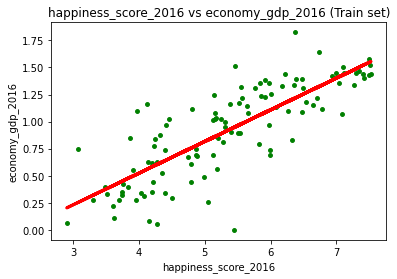

In [76]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs economy_gdp_2016 (Train set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('economy_gdp_2016')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE being even larger on the train set. The R2 is higher in train set compared to test set. 

# 04b. Data Preparation for Regression Analysis - 2016 Data

### happiness_score_2016 vs family_2016

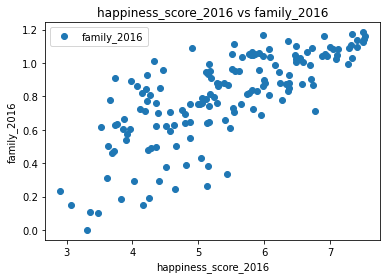

In [77]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2016.plot(x = 'happiness_score_2016', y='family_2016',style='o')
plt.title('happiness_score_2016 vs family_2016')  
plt.xlabel('happiness_score_2016')  
plt.ylabel('family_2016')  
plt.show()

In [78]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2016['happiness_score_2016'].values.reshape(-1,1)
y = df_2016['family_2016'].values.reshape(-1,1)

In [79]:
X

array([[7.526],
       [7.509],
       [7.501],
       [7.498],
       [7.413],
       [7.404],
       [7.339],
       [7.334],
       [7.313],
       [7.291],
       [7.267],
       [7.119],
       [7.104],
       [7.087],
       [7.039],
       [6.994],
       [6.952],
       [6.929],
       [6.907],
       [6.871],
       [6.778],
       [6.739],
       [6.725],
       [6.705],
       [6.701],
       [6.65 ],
       [6.596],
       [6.573],
       [6.545],
       [6.488],
       [6.481],
       [6.478],
       [6.474],
       [6.379],
       [6.379],
       [6.375],
       [6.361],
       [6.355],
       [6.324],
       [6.269],
       [6.239],
       [6.218],
       [6.168],
       [6.084],
       [6.078],
       [6.068],
       [6.005],
       [5.992],
       [5.987],
       [5.977],
       [5.976],
       [5.956],
       [5.921],
       [5.919],
       [5.897],
       [5.856],
       [5.835],
       [5.835],
       [5.822],
       [5.813],
       [5.802],
       [5.771],
       [

In [80]:
y

array([[1.16374],
       [1.14524],
       [1.18326],
       [1.1269 ],
       [1.13464],
       [1.0961 ],
       [1.02912],
       [1.17278],
       [1.10476],
       [1.08764],
       [0.99537],
       [1.08383],
       [1.04782],
       [1.02152],
       [1.08113],
       [1.09774],
       [1.03938],
       [1.05249],
       [1.16157],
       [1.03999],
       [0.7146 ],
       [0.86758],
       [1.08672],
       [0.90587],
       [0.98912],
       [1.06612],
       [1.00793],
       [0.87114],
       [1.03143],
       [1.09879],
       [1.02169],
       [1.00508],
       [1.04477],
       [0.84829],
       [0.92624],
       [0.87964],
       [1.12945],
       [0.83309],
       [0.87119],
       [0.77866],
       [0.87758],
       [0.94397],
       [0.98569],
       [1.03302],
       [1.08268],
       [0.80975],
       [0.88025],
       [0.89521],
       [1.1681 ],
       [1.04167],
       [0.85974],
       [0.68655],
       [1.06054],
       [0.95544],
       [0.83132],
       [1.

In [81]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05b. Regression Analysis - 2016 Data

### happiness_score_2016 vs family_2016

In [82]:
# create a regression object

regression = LinearRegression()

In [83]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [84]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

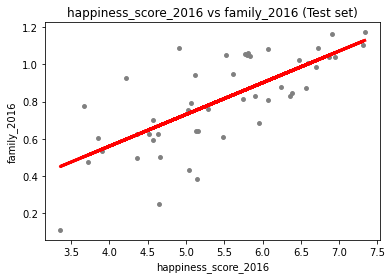

In [85]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs family_2016 (Test set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('family_2016')
plot_test.show()

In [86]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [87]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17045755]]
Mean squared error:  0.02877301862116911
R2 score:  0.5359155920146016


The plot (test model) shows a positive relationship, so the coefficient is positive (0.170). The slope means that as happiness_score_2016 rises, as well as the family_2016 rises too. In this case, the MSE shows 0.029, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of family_2016 to happiness_score_2016. The R2 is 53.6 percent, which the data isn't fit that great.

In [88]:
y_predicted

array([[1.12917758],
       [0.91508289],
       [0.65871473],
       [0.62257773],
       [0.85797961],
       [0.64831682],
       [0.62223681],
       [0.8194562 ],
       [0.67252179],
       [0.74172756],
       [1.02127795],
       [0.51382581],
       [1.0033799 ],
       [0.8680366 ],
       [0.6704763 ],
       [0.53632621],
       [0.59786138],
       [0.73900024],
       [0.54501954],
       [0.8736617 ],
       [0.91337831],
       [0.96639061],
       [0.86991164],
       [1.12559797],
       [0.94252656],
       [0.96229963],
       [0.71547709],
       [1.05025573],
       [0.75911423],
       [0.65888519],
       [0.89428707],
       [0.88423007],
       [1.06406279],
       [0.81451293],
       [0.73695475],
       [1.02536893],
       [0.75331867],
       [0.83616104],
       [0.45177926],
       [0.75229593],
       [0.99945938],
       [0.66911264],
       [0.78093279],
       [0.75706874],
       [1.0563922 ],
       [0.86224105],
       [0.98377728],
       [0.503

In [89]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.17278,1.129178
1,1.08268,0.915083
2,0.70362,0.658715
3,0.49813,0.622578
4,0.81255,0.857980
5,0.62542,0.648317
6,0.62477,0.622237
7,1.05163,0.819456
8,0.50163,0.672522
9,0.79117,0.741728


In [90]:
# predict

y_predicted_train = regression.predict(X_train) 

In [91]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [92]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17045755]]
Mean squared error:  0.03351902560373368
R2 score:  0.5499320616787748


The plot (train model) shows a positive relationship, so the coefficient is positive (0.170). The slope means that as happiness_score_2016 rises, as well as the family_2016 rises too. In this case, the MSE shows 0.034, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of family_2016 to happiness_score_2016. The R2 is 57.6 percent, which the data isn't fit that great.

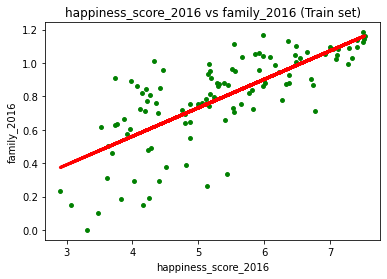

In [93]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs family_2016 (Train set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('family_2016')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set. 

# 04c. Data Preparation for Regression Analysis - 2016 Data

### happiness_score_2016 vs health_life_expectancy_2016

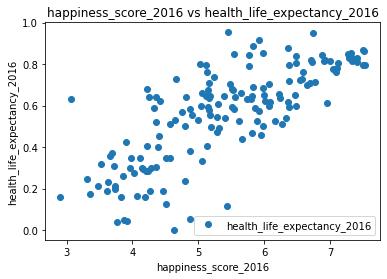

In [94]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2016.plot(x ='happiness_score_2016', y='health_life_expectancy_2016',style='o')
plt.title('happiness_score_2016 vs health_life_expectancy_2016')  
plt.xlabel('happiness_score_2016')  
plt.ylabel('health_life_expectancy_2016')  
plt.show()

In [95]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2016['happiness_score_2016'].values.reshape(-1,1)
y = df_2016['health_life_expectancy_2016'].values.reshape(-1,1)

In [96]:
X

array([[7.526],
       [7.509],
       [7.501],
       [7.498],
       [7.413],
       [7.404],
       [7.339],
       [7.334],
       [7.313],
       [7.291],
       [7.267],
       [7.119],
       [7.104],
       [7.087],
       [7.039],
       [6.994],
       [6.952],
       [6.929],
       [6.907],
       [6.871],
       [6.778],
       [6.739],
       [6.725],
       [6.705],
       [6.701],
       [6.65 ],
       [6.596],
       [6.573],
       [6.545],
       [6.488],
       [6.481],
       [6.478],
       [6.474],
       [6.379],
       [6.379],
       [6.375],
       [6.361],
       [6.355],
       [6.324],
       [6.269],
       [6.239],
       [6.218],
       [6.168],
       [6.084],
       [6.078],
       [6.068],
       [6.005],
       [5.992],
       [5.987],
       [5.977],
       [5.976],
       [5.956],
       [5.921],
       [5.919],
       [5.897],
       [5.856],
       [5.835],
       [5.835],
       [5.822],
       [5.813],
       [5.802],
       [5.771],
       [

In [97]:
y

array([[0.79504],
       [0.86303],
       [0.86733],
       [0.79579],
       [0.81091],
       [0.8276 ],
       [0.81231],
       [0.83096],
       [0.8512 ],
       [0.83121],
       [0.84917],
       [0.80565],
       [0.779  ],
       [0.76146],
       [0.77758],
       [0.81487],
       [0.61415],
       [0.81959],
       [0.81455],
       [0.84542],
       [0.71143],
       [0.94719],
       [0.80991],
       [0.81883],
       [0.70835],
       [0.69711],
       [0.76376],
       [0.72993],
       [0.72183],
       [0.80315],
       [0.59659],
       [0.83795],
       [0.64915],
       [0.59267],
       [0.79565],
       [0.71723],
       [0.87896],
       [0.61804],
       [0.54039],
       [0.50933],
       [0.63569],
       [0.65696],
       [0.52608],
       [0.61904],
       [0.70367],
       [0.596  ],
       [0.62366],
       [0.65213],
       [0.50163],
       [0.85102],
       [0.68613],
       [0.45569],
       [0.91491],
       [0.57386],
       [0.52309],
       [0.

In [98]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05c. Regression Analysis - 2016 Data

### happiness_score_2016 vs health_life_expectancy_2016

In [99]:
# create a regression object

regression = LinearRegression()

In [100]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [101]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

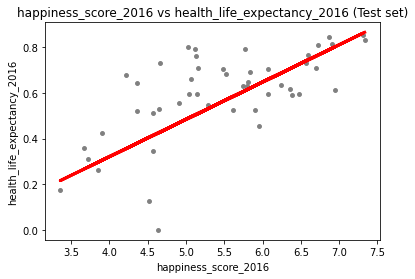

In [102]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs health_life_expectancy_2016 (Test set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('health_life_expectancy_2016')
plot_test.show()

In [103]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [104]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.16319491]]
Mean squared error:  0.023869077808749067
R2 score:  0.3334562098114029


The plot (test model) shows a positive relationship, so the coefficient is positive (0.163). The slope means that as happiness_score_2016 rises, as well as the health_life_expectancy_2016 rises too. In this case, the MSE shows 0.024, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2016 to happiness_score_2016. The R2 is 33.3 percent, which the data isn't fit that great.

In [105]:
y_predicted

array([[0.86457227],
       [0.65959946],
       [0.41415432],
       [0.379557  ],
       [0.60492917],
       [0.40419943],
       [0.37923061],
       [0.56804712],
       [0.42737311],
       [0.49363024],
       [0.76126989],
       [0.27543865],
       [0.74413443],
       [0.61455767],
       [0.42541477],
       [0.29698038],
       [0.35589374],
       [0.49101912],
       [0.30530332],
       [0.6199431 ],
       [0.65796751],
       [0.70872113],
       [0.61635281],
       [0.86114517],
       [0.68587384],
       [0.70480445],
       [0.46849823],
       [0.78901302],
       [0.51027612],
       [0.41431752],
       [0.63968968],
       [0.63006118],
       [0.80223181],
       [0.56331447],
       [0.48906078],
       [0.76518657],
       [0.50472749],
       [0.58404022],
       [0.2160357 ],
       [0.50374833],
       [0.74038094],
       [0.42410921],
       [0.53116507],
       [0.50831778],
       [0.79488804],
       [0.60900904],
       [0.72536701],
       [0.265

In [106]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.83096,0.864572
1,0.70367,0.659599
2,0.34745,0.414154
3,0.52116,0.379557
4,0.62994,0.604929
5,0.12698,0.404199
6,0.64083,0.379231
7,0.68098,0.568047
8,0.73007,0.427373
9,0.66157,0.493630


In [107]:
# predict

y_predicted_train = regression.predict(X_train) 

In [108]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [109]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.16319491]]
Mean squared error:  0.021028836475194622
R2 score:  0.6409598513435053


The plot (train model) shows a positive relationship, so the coefficient is positive (0.163). The slope means that as happiness_score_2016 rises, as well as the health_life_expectancy_2016 rises too. In this case, the MSE shows 0.021, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2016 to happiness_score_2016. The R2 is 64.1 percent, which the data isn't fit that great.

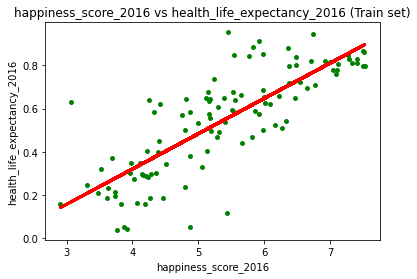

In [110]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs health_life_expectancy_2016 (Train set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('health_life_expectancy_2016')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04d. Data Preparation for Regression Analysis - 2016 Data

### happiness_score_2016 vs freedom_2016

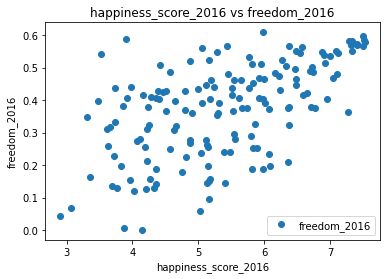

In [111]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2016.plot(x = 'happiness_score_2016', y='freedom_2016',style='o')
plt.title('happiness_score_2016 vs freedom_2016')  
plt.xlabel('happiness_score_2016')  
plt.ylabel('freedom_2016')  
plt.show()

In [112]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2016['happiness_score_2016'].values.reshape(-1,1)
y = df_2016['freedom_2016'].values.reshape(-1,1)

In [113]:
X

array([[7.526],
       [7.509],
       [7.501],
       [7.498],
       [7.413],
       [7.404],
       [7.339],
       [7.334],
       [7.313],
       [7.291],
       [7.267],
       [7.119],
       [7.104],
       [7.087],
       [7.039],
       [6.994],
       [6.952],
       [6.929],
       [6.907],
       [6.871],
       [6.778],
       [6.739],
       [6.725],
       [6.705],
       [6.701],
       [6.65 ],
       [6.596],
       [6.573],
       [6.545],
       [6.488],
       [6.481],
       [6.478],
       [6.474],
       [6.379],
       [6.379],
       [6.375],
       [6.361],
       [6.355],
       [6.324],
       [6.269],
       [6.239],
       [6.218],
       [6.168],
       [6.084],
       [6.078],
       [6.068],
       [6.005],
       [5.992],
       [5.987],
       [5.977],
       [5.976],
       [5.956],
       [5.921],
       [5.919],
       [5.897],
       [5.856],
       [5.835],
       [5.835],
       [5.822],
       [5.813],
       [5.802],
       [5.771],
       [

In [114]:
y

array([[0.57941],
       [0.58557],
       [0.56624],
       [0.59609],
       [0.57104],
       [0.5737 ],
       [0.55211],
       [0.58147],
       [0.56837],
       [0.58218],
       [0.36432],
       [0.54355],
       [0.48163],
       [0.55225],
       [0.46823],
       [0.53466],
       [0.40425],
       [0.51354],
       [0.54008],
       [0.5487 ],
       [0.37709],
       [0.4877 ],
       [0.50036],
       [0.37789],
       [0.48927],
       [0.42284],
       [0.41418],
       [0.56215],
       [0.54388],
       [0.54994],
       [0.44735],
       [0.46562],
       [0.49553],
       [0.37904],
       [0.32377],
       [0.56679],
       [0.37545],
       [0.21006],
       [0.50379],
       [0.52234],
       [0.43166],
       [0.47375],
       [0.48453],
       [0.19847],
       [0.23391],
       [0.37269],
       [0.39031],
       [0.46582],
       [0.60848],
       [0.18827],
       [0.4027 ],
       [0.51231],
       [0.46761],
       [0.4052 ],
       [0.25202],
       [0.

In [115]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05d. Regression Analysis - 2016 Data

### happiness_score_2016 vs freedom_2016

In [116]:
# create a regression object

regression = LinearRegression()

In [117]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [118]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

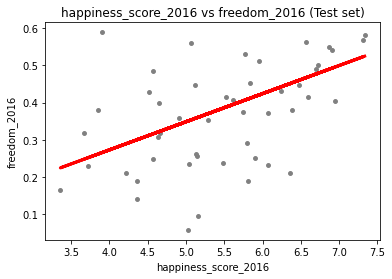

In [119]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs freedom_2016 (Test set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('freedom_2016')
plot_test.show()

In [120]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [121]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0754305]]
Mean squared error:  0.01543076998792403
R2 score:  0.1893369481650281


The plot (test model) shows a positive relationship, so the coefficient is positive (0.075). The slope means that as happiness_score_2016 rises, as well as the freedom_2016 rises too. In this case, the MSE shows 0.015, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2016 to happiness_score_2016. The R2 is 18.9 percent, which the data isn't fit that great.

In [122]:
y_predicted

array([[0.52463548],
       [0.42989477],
       [0.3164473 ],
       [0.30045604],
       [0.40462556],
       [0.31184604],
       [0.30030518],
       [0.38757826],
       [0.32255717],
       [0.35318196],
       [0.47688797],
       [0.25233138],
       [0.46896777],
       [0.40907596],
       [0.32165201],
       [0.2622882 ],
       [0.28951861],
       [0.35197507],
       [0.26613516],
       [0.41156516],
       [0.42914047],
       [0.45259935],
       [0.40990569],
       [0.52305144],
       [0.44203908],
       [0.45078902],
       [0.34156566],
       [0.48971116],
       [0.36087587],
       [0.31652273],
       [0.42069225],
       [0.41624185],
       [0.49582103],
       [0.38539078],
       [0.3510699 ],
       [0.47869831],
       [0.35831123],
       [0.39497045],
       [0.22487468],
       [0.35785865],
       [0.46723287],
       [0.32104856],
       [0.37053097],
       [0.3599707 ],
       [0.49242666],
       [0.40651132],
       [0.46029326],
       [0.247

In [123]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.58147,0.524635
1,0.23391,0.429895
2,0.48614,0.316447
3,0.18847,0.300456
4,0.37502,0.404626
5,0.42736,0.311846
6,0.14037,0.300305
7,0.41511,0.387578
8,0.31866,0.322557
9,0.55954,0.353182


In [124]:
# predict

y_predicted_train = regression.predict(X_train) 

In [125]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [126]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0754305]]
Mean squared error:  0.0138489109153573
R2 score:  0.3667357021147424


The plot (train model) shows a positive relationship, so the coefficient is positive (0.075). The slope means that as happiness_score_2016 rises, as well as the freedom_2016 rises too. In this case, the MSE shows 0.014, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2016 to happiness_score_2016. The R2 is 36.7 percent, which the data isn't fit that great.

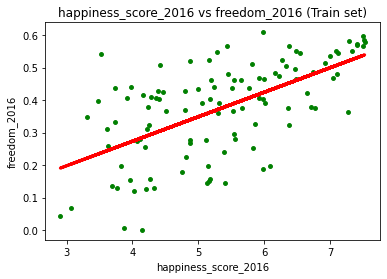

In [127]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs freedom_2016 (Train set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('freedom_2016')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04e. Data Preparation for Regression Analysis - 2016 Data

### happiness_score_2016 vs trust_2016

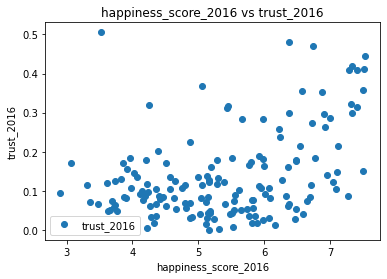

In [128]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2016.plot(x = 'happiness_score_2016', y='trust_2016',style='o')
plt.title('happiness_score_2016 vs trust_2016')  
plt.xlabel('happiness_score_2016')  
plt.ylabel('trust_2016')  
plt.show()

In [129]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2016['happiness_score_2016'].values.reshape(-1,1)
y = df_2016['trust_2016'].values.reshape(-1,1)

In [130]:
X

array([[7.526],
       [7.509],
       [7.501],
       [7.498],
       [7.413],
       [7.404],
       [7.339],
       [7.334],
       [7.313],
       [7.291],
       [7.267],
       [7.119],
       [7.104],
       [7.087],
       [7.039],
       [6.994],
       [6.952],
       [6.929],
       [6.907],
       [6.871],
       [6.778],
       [6.739],
       [6.725],
       [6.705],
       [6.701],
       [6.65 ],
       [6.596],
       [6.573],
       [6.545],
       [6.488],
       [6.481],
       [6.478],
       [6.474],
       [6.379],
       [6.379],
       [6.375],
       [6.361],
       [6.355],
       [6.324],
       [6.269],
       [6.239],
       [6.218],
       [6.168],
       [6.084],
       [6.078],
       [6.068],
       [6.005],
       [5.992],
       [5.987],
       [5.977],
       [5.976],
       [5.956],
       [5.921],
       [5.919],
       [5.897],
       [5.856],
       [5.835],
       [5.835],
       [5.822],
       [5.813],
       [5.802],
       [5.771],
       [

In [131]:
y

array([[0.44453],
       [0.41203],
       [0.14975],
       [0.35776],
       [0.41004],
       [0.31329],
       [0.29927],
       [0.41904],
       [0.32331],
       [0.40867],
       [0.08728],
       [0.21348],
       [0.14868],
       [0.10547],
       [0.12275],
       [0.28551],
       [0.14166],
       [0.26248],
       [0.29754],
       [0.35329],
       [0.18355],
       [0.46987],
       [0.27399],
       [0.11451],
       [0.08423],
       [0.07296],
       [0.03986],
       [0.35561],
       [0.21394],
       [0.17554],
       [0.05399],
       [0.17808],
       [0.02833],
       [0.30008],
       [0.0663 ],
       [0.48049],
       [0.06137],
       [0.16157],
       [0.08701],
       [0.12692],
       [0.23669],
       [0.25772],
       [0.01241],
       [0.08304],
       [0.02947],
       [0.10613],
       [0.09081],
       [0.16292],
       [0.28333],
       [0.02556],
       [0.18037],
       [0.10771],
       [0.18985],
       [0.11132],
       [0.01903],
       [0.

In [132]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05e. Regression Analysis - 2016 Data

### happiness_score_2016 vs trust_2016¶

In [133]:
# create a regression object

regression = LinearRegression()

In [134]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [135]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

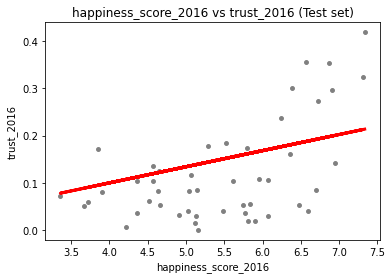

In [136]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs trust_2016 (Test set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('trust_2016')
plot_test.show()

In [137]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [138]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03417008]]
Mean squared error:  0.008882460778230692
R2 score:  0.16982645283486275


The plot (test model) shows a positive relationship, so the coefficient is positive (0.034). The slope means that as happiness_score_2016 rises, as well as the trust_2016 rises too. In this case, the MSE shows 0.009, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2016 to happiness_score_2016. The R2 is 17 percent, which the data fit very poor.

In [139]:
y_predicted

array([[0.2138382 ],
       [0.17092058],
       [0.11952879],
       [0.11228473],
       [0.15947361],
       [0.11744441],
       [0.11221639],
       [0.15175117],
       [0.12229656],
       [0.13616961],
       [0.19220854],
       [0.09048422],
       [0.18862068],
       [0.16148964],
       [0.12188652],
       [0.09499467],
       [0.10733007],
       [0.13562289],
       [0.09673734],
       [0.16261725],
       [0.17057888],
       [0.18120578],
       [0.16186551],
       [0.21312063],
       [0.17642197],
       [0.18038569],
       [0.13090742],
       [0.19801745],
       [0.13965496],
       [0.11956296],
       [0.16675183],
       [0.1647358 ],
       [0.20078523],
       [0.15076024],
       [0.13521285],
       [0.19302862],
       [0.13849318],
       [0.15509984],
       [0.07804631],
       [0.13828816],
       [0.18783477],
       [0.12161316],
       [0.14402873],
       [0.13924492],
       [0.19924758],
       [0.16032786],
       [0.18469112],
       [0.088

In [140]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.41904,0.213838
1,0.02947,0.170921
2,0.10398,0.119529
3,0.10393,0.112285
4,0.05292,0.159474
5,0.06126,0.117444
6,0.03616,0.112216
7,0.18519,0.151751
8,0.05301,0.122297
9,0.11556,0.136170


In [141]:
# predict

y_predicted_train = regression.predict(X_train) 

In [142]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [143]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03417008]]
Mean squared error:  0.011058066841994674
R2 score:  0.12955233396884958


The plot (train model) shows a positive relationship, so the coefficient is positive (0.034). The slope means that as happiness_score_2016 rises, as well as the trust_2016 rises too. In this case, the MSE shows 0.011, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2016 to happiness_score_2016. The R2 is 13 percent, which the data fit very poor.

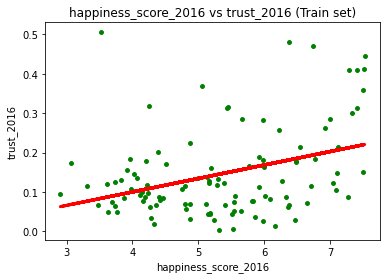

In [144]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs trust_2016 (Train set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('trust_2016')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04f. Data Preparation for Regression Analysis - 2016 Data


### happiness_score_2016 vs generosity_2016

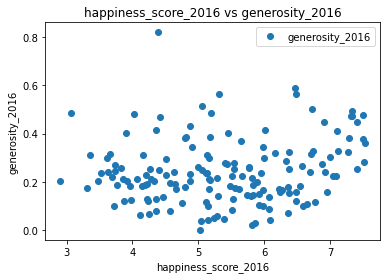

In [145]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2016.plot(x = 'happiness_score_2016', y='generosity_2016',style='o')
plt.title('happiness_score_2016 vs generosity_2016')  
plt.xlabel('happiness_score_2016')  
plt.ylabel('generosity_2016')  
plt.show()

In [146]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2016['happiness_score_2016'].values.reshape(-1,1)
y = df_2016['generosity_2016'].values.reshape(-1,1)

In [147]:
X

array([[7.526],
       [7.509],
       [7.501],
       [7.498],
       [7.413],
       [7.404],
       [7.339],
       [7.334],
       [7.313],
       [7.291],
       [7.267],
       [7.119],
       [7.104],
       [7.087],
       [7.039],
       [6.994],
       [6.952],
       [6.929],
       [6.907],
       [6.871],
       [6.778],
       [6.739],
       [6.725],
       [6.705],
       [6.701],
       [6.65 ],
       [6.596],
       [6.573],
       [6.545],
       [6.488],
       [6.481],
       [6.478],
       [6.474],
       [6.379],
       [6.379],
       [6.375],
       [6.361],
       [6.355],
       [6.324],
       [6.269],
       [6.239],
       [6.218],
       [6.168],
       [6.084],
       [6.078],
       [6.068],
       [6.005],
       [5.992],
       [5.987],
       [5.977],
       [5.976],
       [5.956],
       [5.921],
       [5.919],
       [5.897],
       [5.856],
       [5.835],
       [5.835],
       [5.822],
       [5.813],
       [5.802],
       [5.771],
       [

In [148]:
y

array([[0.36171],
       [0.28083],
       [0.47678],
       [0.37895],
       [0.25492],
       [0.44834],
       [0.47416],
       [0.49401],
       [0.47407],
       [0.38254],
       [0.32288],
       [0.32865],
       [0.41077],
       [0.22553],
       [0.22202],
       [0.30452],
       [0.15776],
       [0.2424 ],
       [0.44963],
       [0.27571],
       [0.11735],
       [0.32706],
       [0.50156],
       [0.31595],
       [0.2418 ],
       [0.10989],
       [0.09929],
       [0.26591],
       [0.18056],
       [0.56237],
       [0.15626],
       [0.1216 ],
       [0.58696],
       [0.15457],
       [0.25495],
       [0.32388],
       [0.17665],
       [0.07044],
       [0.28808],
       [0.16665],
       [0.15965],
       [0.17147],
       [0.31935],
       [0.0425 ],
       [0.13837],
       [0.08877],
       [0.41474],
       [0.29773],
       [0.34326],
       [0.16684],
       [0.10074],
       [0.23684],
       [0.10224],
       [0.15011],
       [0.19997],
       [0.

In [149]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05f. Regression Analysis - 2016 Data

### happiness_score_2016 vs generosity_2016

In [150]:
# create a regression object

regression = LinearRegression()

In [151]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [152]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

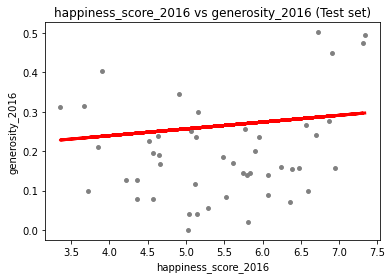

In [153]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs generosity_2016 (Test set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('generosity_2016')
plot_test.show()

In [154]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [155]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01723141]]
Mean squared error:  0.018730984130584553
R2 score:  -0.2611705532291493


The plot (test model) shows a positive relationship, so the coefficient is positive (0.017). The slope means that as happiness_score_2016 rises, as well as the generosity_2016 rises too. In this case, the MSE shows 0.0187, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2016 to happiness_score_2016. The R2 is -26 percent, which the data fit very poor.

In [156]:
y_predicted

array([[0.29683431],
       [0.27519166],
       [0.24927563],
       [0.24562257],
       [0.26941914],
       [0.24822451],
       [0.24558811],
       [0.26552485],
       [0.25067137],
       [0.25766732],
       [0.28592683],
       [0.23462893],
       [0.28411753],
       [0.2704358 ],
       [0.2504646 ],
       [0.23690348],
       [0.24312402],
       [0.25739162],
       [0.23778228],
       [0.27100443],
       [0.27501935],
       [0.28037832],
       [0.27062534],
       [0.29647245],
       [0.27796592],
       [0.27996476],
       [0.25501369],
       [0.28885617],
       [0.25942493],
       [0.24929286],
       [0.27308943],
       [0.27207278],
       [0.29025191],
       [0.26502513],
       [0.25718484],
       [0.28634039],
       [0.25883906],
       [0.26721352],
       [0.2283567 ],
       [0.25873567],
       [0.28372121],
       [0.25032674],
       [0.26163055],
       [0.25921815],
       [0.2894765 ],
       [0.26984993],
       [0.28213592],
       [0.233

In [157]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.49401,0.296834
1,0.13837,0.275192
2,0.07795,0.249276
3,0.12706,0.245623
4,0.14527,0.269419
5,0.22680,0.248225
6,0.07793,0.245588
7,0.08423,0.265525
8,0.16840,0.250671
9,0.25075,0.257667


In [158]:
# predict

y_predicted_train = regression.predict(X_train) 

In [159]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [160]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01723141]]
Mean squared error:  0.01733816967355553
R2 score:  0.02357050980288178


The plot (train model) shows a positive relationship, so the coefficient is positive (0.017). The slope means that as happiness_score_2016 rises, as well as the generosity_2016 rises too. In this case, the MSE shows 0.0173, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2016 to happiness_score_2016. The R2 is 2.4 percent, which the data fit very poor.

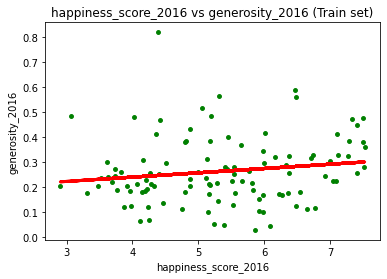

In [161]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs generosity_2016 (Train set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('generosity_2016')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the train set; The R2 is higher in test set compared to train set.

# 04g. Data Preparation for Regression Analysis - 2016 Data

### happiness_score_2016 vs dystopia_residual_2016

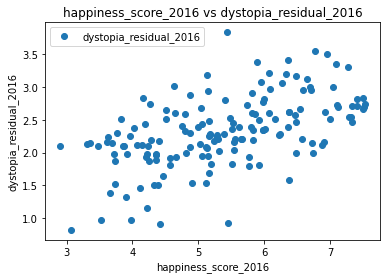

In [162]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2016.plot(x = 'happiness_score_2016', y='dystopia_residual_2016',style='o')
plt.title('happiness_score_2016 vs dystopia_residual_2016')  
plt.xlabel('happiness_score_2016')  
plt.ylabel('dystopia_residual_2016')  
plt.show()

In [163]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2016['happiness_score_2016'].values.reshape(-1,1)
y = df_2016['dystopia_residual_2016'].values.reshape(-1,1)

In [164]:
X

array([[7.526],
       [7.509],
       [7.501],
       [7.498],
       [7.413],
       [7.404],
       [7.339],
       [7.334],
       [7.313],
       [7.291],
       [7.267],
       [7.119],
       [7.104],
       [7.087],
       [7.039],
       [6.994],
       [6.952],
       [6.929],
       [6.907],
       [6.871],
       [6.778],
       [6.739],
       [6.725],
       [6.705],
       [6.701],
       [6.65 ],
       [6.596],
       [6.573],
       [6.545],
       [6.488],
       [6.481],
       [6.478],
       [6.474],
       [6.379],
       [6.379],
       [6.375],
       [6.361],
       [6.355],
       [6.324],
       [6.269],
       [6.239],
       [6.218],
       [6.168],
       [6.084],
       [6.078],
       [6.068],
       [6.005],
       [5.992],
       [5.987],
       [5.977],
       [5.976],
       [5.956],
       [5.921],
       [5.919],
       [5.897],
       [5.856],
       [5.835],
       [5.835],
       [5.822],
       [5.813],
       [5.802],
       [5.771],
       [

In [165]:
y

array([[2.73939],
       [2.69463],
       [2.83137],
       [2.66465],
       [2.82596],
       [2.70485],
       [2.70749],
       [2.47553],
       [2.5465 ],
       [2.54734],
       [3.31029],
       [2.69343],
       [2.72782],
       [3.35168],
       [3.0076 ],
       [2.50931],
       [3.50733],
       [2.61355],
       [2.15988],
       [2.11055],
       [3.55906],
       [1.99375],
       [2.14999],
       [2.95505],
       [3.00559],
       [3.12985],
       [2.96211],
       [2.21507],
       [2.67139],
       [1.99032],
       [3.17471],
       [2.4744 ],
       [2.5796 ],
       [2.61482],
       [2.61523],
       [1.58224],
       [2.39663],
       [3.40904],
       [3.19863],
       [3.06852],
       [2.28085],
       [2.27405],
       [2.51394],
       [2.97468],
       [2.61065],
       [3.22134],
       [2.35384],
       [2.82428],
       [2.34638],
       [2.34918],
       [2.77366],
       [3.08039],
       [1.80584],
       [2.49325],
       [3.38007],
       [2.

In [166]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05g. Regression Analysis - 2016 Data

### happiness_score_2016 vs dystopia_residual_2016

In [167]:
# create a regression object

regression = LinearRegression()

In [168]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [169]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

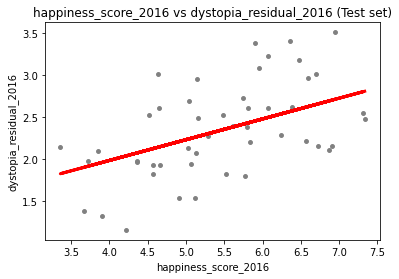

In [170]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs dystopia_residual_2016 (Test set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('dystopia_residual_2016')
plot_test.show()

In [171]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [172]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2471041]]
Mean squared error:  0.22233797374385592
R2 score:  0.27819230433073516


The plot (test model) shows a positive relationship, so the coefficient is positive (0.025). The slope means that as happiness_score_2016 rises, as well as the dystopia_residual_2016 rises too. In this case, the MSE shows 0.222, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of dystopia_residual_2016 to happiness_score_2016. The R2 is 27.8 percent, which the data doesn't fit great.

In [173]:
y_predicted

array([[2.80583098],
       [2.49546822],
       [2.12382365],
       [2.07143758],
       [2.41268835],
       [2.1087503 ],
       [2.07094338],
       [2.35684282],
       [2.14383909],
       [2.24416335],
       [2.64941408],
       [1.91378517],
       [2.62346815],
       [2.42726749],
       [2.14087384],
       [1.94640291],
       [2.03560749],
       [2.24020969],
       [1.95900522],
       [2.43542193],
       [2.49299718],
       [2.56984656],
       [2.42998564],
       [2.80064179],
       [2.53525198],
       [2.56391606],
       [2.20610932],
       [2.69142178],
       [2.26936797],
       [2.12407076],
       [2.46532152],
       [2.45074238],
       [2.71143721],
       [2.3496768 ],
       [2.23724444],
       [2.65534458],
       [2.26096643],
       [2.38105902],
       [1.82383927],
       [2.25948381],
       [2.61778476],
       [2.138897  ],
       [2.3009973 ],
       [2.26640272],
       [2.70031753],
       [2.41886595],
       [2.59505118],
       [1.899

In [174]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.47553,2.805831
1,2.61065,2.495468
2,1.92198,2.123824
3,1.96895,2.071438
4,2.73117,2.412688
5,2.51980,2.108750
6,1.97864,2.070943
7,1.81985,2.356843
8,1.92816,2.143839
9,1.94180,2.244163


In [175]:
# predict

y_predicted_train = regression.predict(X_train) 

In [176]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [177]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2471041]]
Mean squared error:  0.1987005849841942
R2 score:  0.30224230239330974


The plot (train model) shows a positive relationship, so the coefficient is positive (0.025). The slope means that as happiness_score_2016 rises, as well as the dystopia_residual_2016 rises too. In this case, the MSE shows 0.198, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of dystopia_residual_2016 to happiness_score_2016. The R2 is 30 percent, which the data doesn't fit great.

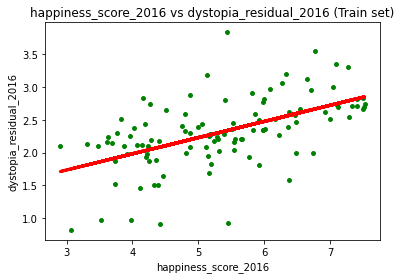

In [178]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2016 vs dystopia_residual_2016 (Train set)')
plot_test.xlabel('happiness_score_2016')
plot_test.ylabel('dystopia_residual_2016')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.